## *Assignment- Advanced Regression*

### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The 
company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.

### Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

### Approach:

1.   Importing modules, Reading the data
2.   Analyzing Numerical Features
    *   Checking Statistical summary
    *   Checking Distribution of numerical features
    *   Outlier Treatment
    *   Inspecting Correlation
    *   Missing Value Handling
    *   Extracting new features and drop redundant ones
    *   Correcting datatype
    *   Univaritate and Bivariate Analysis, Data Visualization
3.  Analyzing Categorical Features
    *   Missing Value Handling
    *   Encoding Categorical Features
    *   Data Visualization
    *   Dropping Redundant Features
4.  Splitting data into Train and Test data
    *   Transformation of Target Variable
    *   Imputing Missing Values
    *   Feature Scaling
5.  Primary Feature Selection using RFE
6.  Ridge Regression
7.  Lasso Regression
8.  Comparing model coefficients
9.  Model Evaluation 
10. Choosing the final model and most significant features.

In [1]:
import gc
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
gc.collect()

0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [3]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_df.shape

(1460, 81)

In [6]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [8]:
len(numeric_df.columns)

38

### Analyzing Numerical Data

#### Outlier Detection

In [9]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Comment:**
- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [11]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [12]:
# Checking the dataset after reassigning minmum and maximum values

housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Correlation in Numeric Data

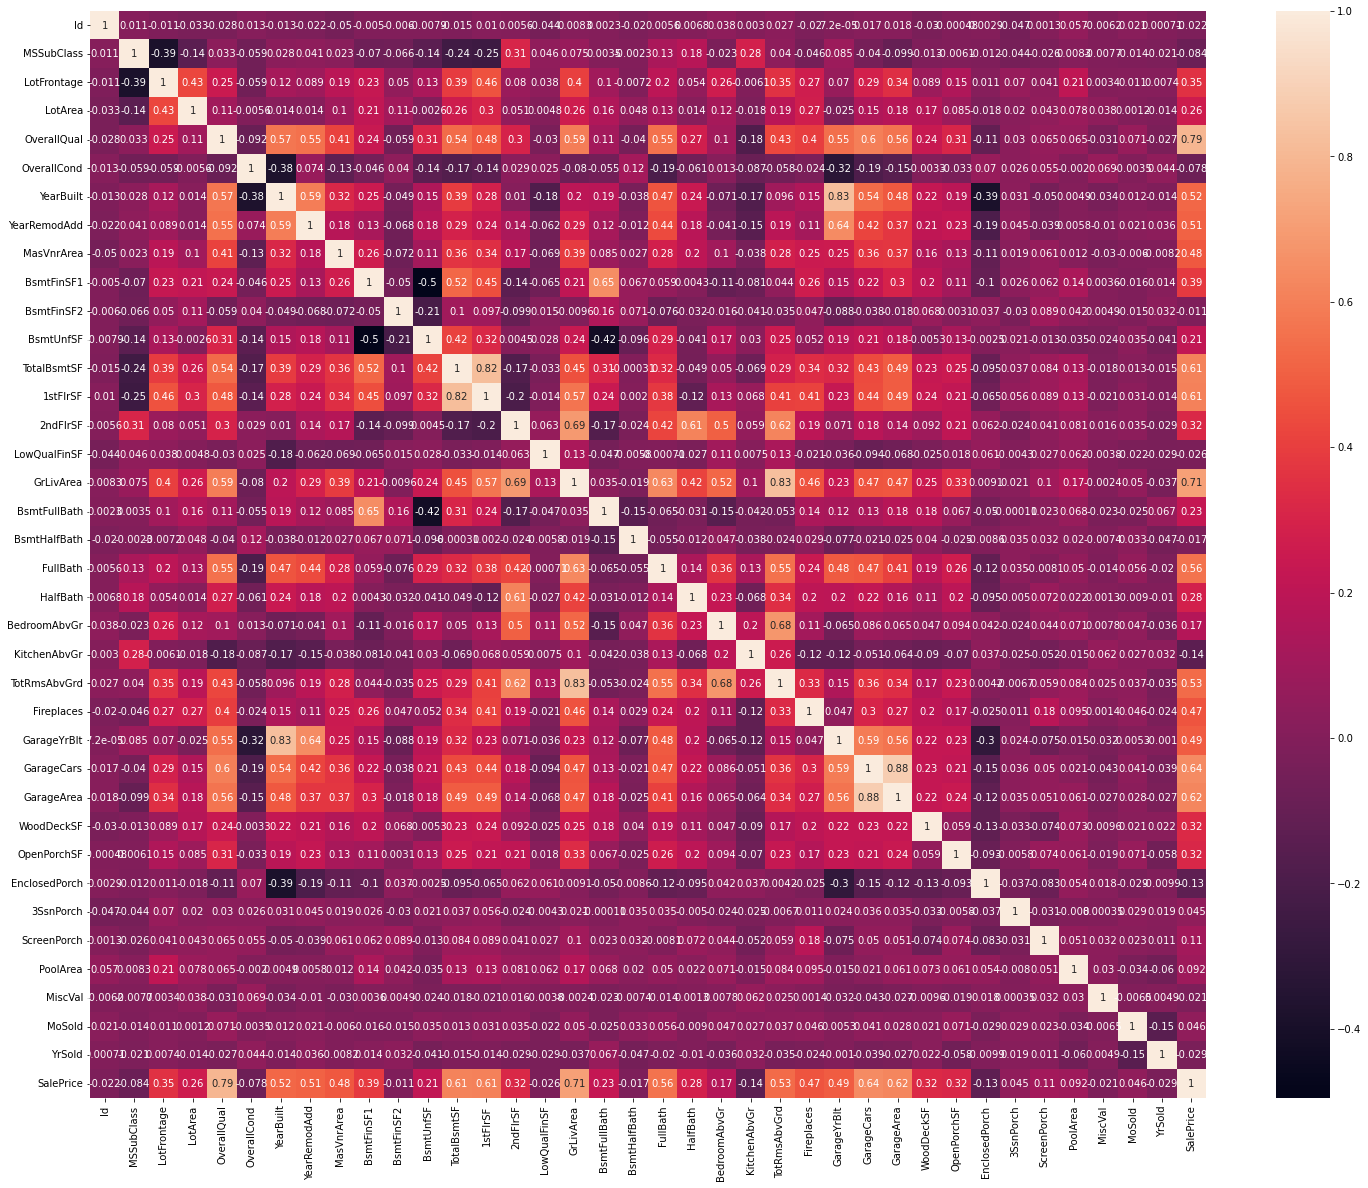

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

In [14]:
numeric_df.corr()['YearBuilt'][((numeric_df.corr()['YearBuilt']>0.80) & (numeric_df.corr()['YearBuilt']<1)) | 
                                ((numeric_df.corr()['YearBuilt']<-0.80) & (numeric_df.corr()['YearBuilt']>-1))]

GarageYrBlt    0.825667
Name: YearBuilt, dtype: float64

In [15]:
(((numeric_df.corr()['YearBuilt']>0.80) & (numeric_df.corr()['YearBuilt']<1)) | 
                                ((numeric_df.corr()['YearBuilt']<-0.80) & (numeric_df.corr()['YearBuilt']>-1))).any()

True

In [16]:
for i in numeric_df.corr().columns:
    if (((numeric_df.corr()[i]>0.80) & (numeric_df.corr()[i]<1)) | 
                                ((numeric_df.corr()[i]<-0.80) & (numeric_df.corr()[i]>-1))).any():
        print(numeric_df.corr()[i][(numeric_df.corr()[i]>0.80) & (numeric_df.corr()[i]<1) | 
                                (numeric_df.corr()[i]<-0.80) & (numeric_df.corr()[i]>-1)])
        print("**********")

GarageYrBlt    0.825667
Name: YearBuilt, dtype: float64
**********
1stFlrSF    0.81953
Name: TotalBsmtSF, dtype: float64
**********
TotalBsmtSF    0.81953
Name: 1stFlrSF, dtype: float64
**********
TotRmsAbvGrd    0.825489
Name: GrLivArea, dtype: float64
**********
GrLivArea    0.825489
Name: TotRmsAbvGrd, dtype: float64
**********
YearBuilt    0.825667
Name: GarageYrBlt, dtype: float64
**********
GarageArea    0.882475
Name: GarageCars, dtype: float64
**********
GarageCars    0.882475
Name: GarageArea, dtype: float64
**********


**Comment**
- Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

#### Univariate and Bivariate Analysis - Numerical Features

##### Analyzing Numerical Features with continuous values

In [17]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

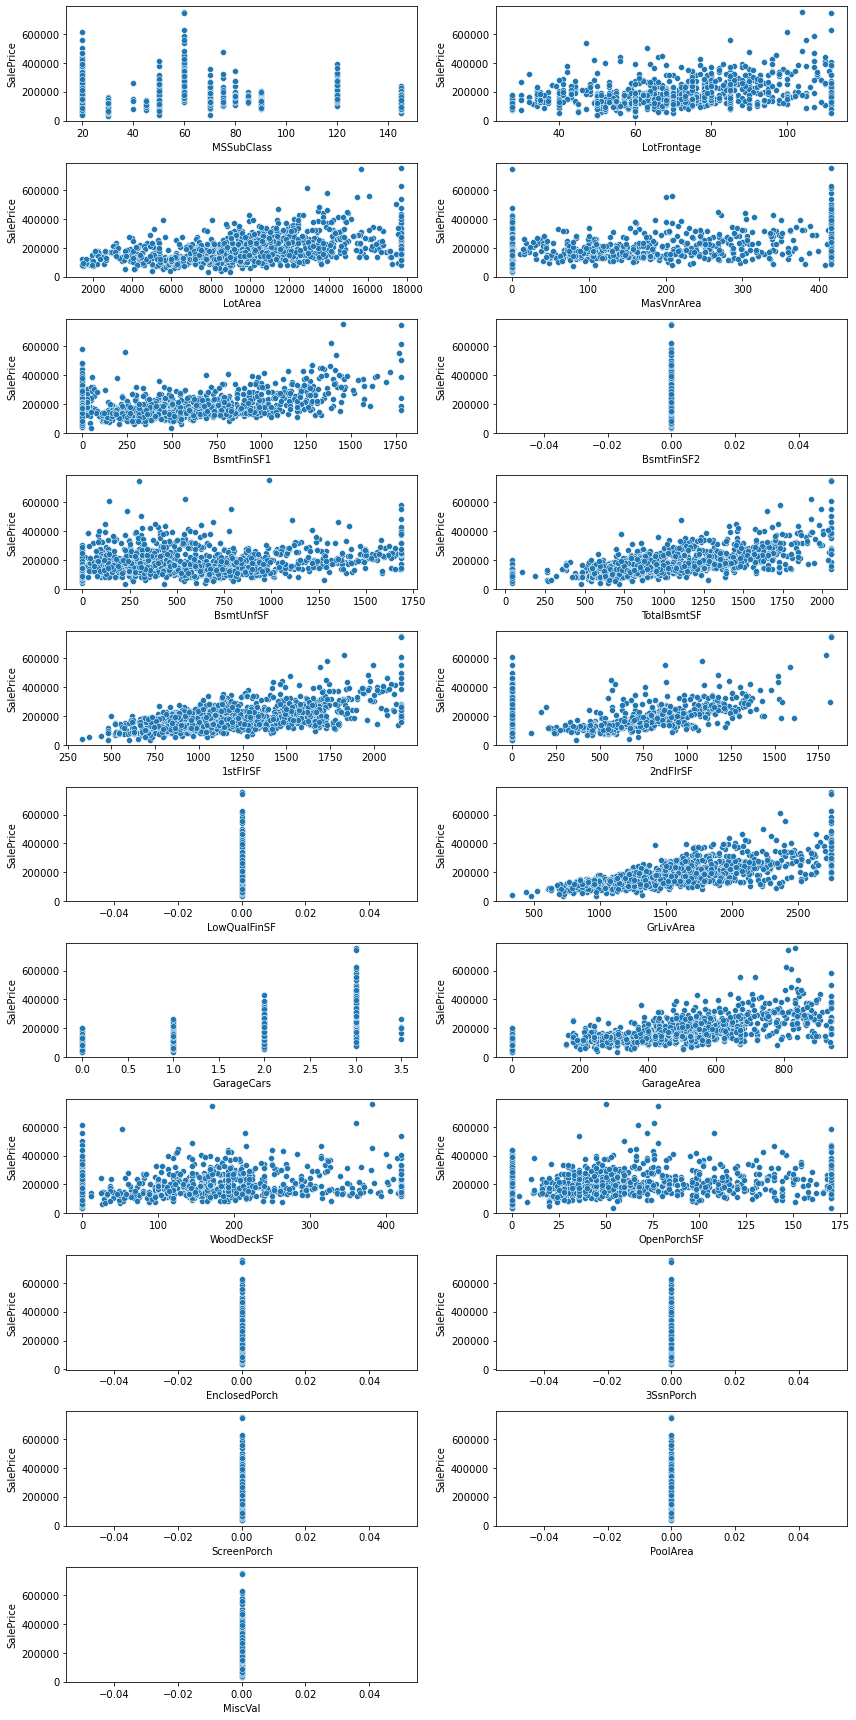

In [18]:
fig=plt.subplots(figsize=(12,24))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF',
                             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(11, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**

- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values
- 'BsmtSF2' has single value and can be dropped.
- 'GrLivArea' and 'GarageArea' are showing positive correlation with SalePrice.
- 'LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' features have single values and can be dropped.

##### Visualizing the distribution of the numeric features

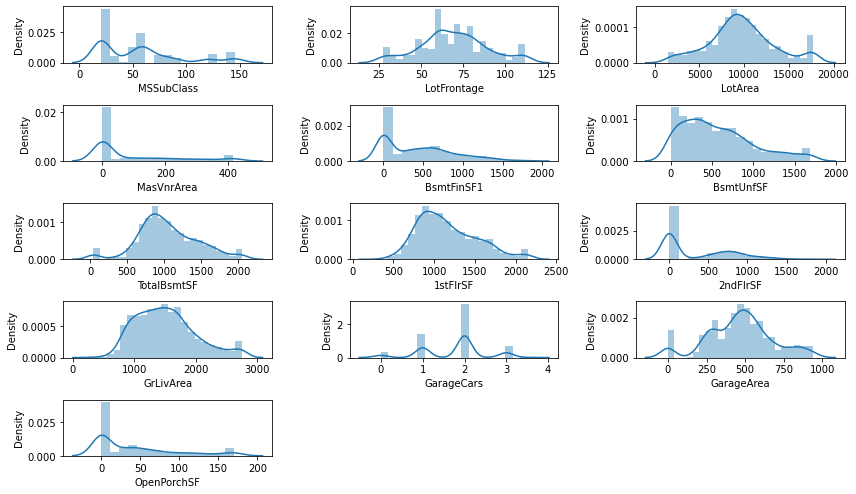

In [19]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF',
                             '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [20]:
housing_df[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


Removing these features having fixed values as they won't contribute in predicting SalePrice
* 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'

In [21]:
housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

##### Analyzing Numerical Features with Discrete Values

In [23]:
# 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
# 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold',

In [24]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
            'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


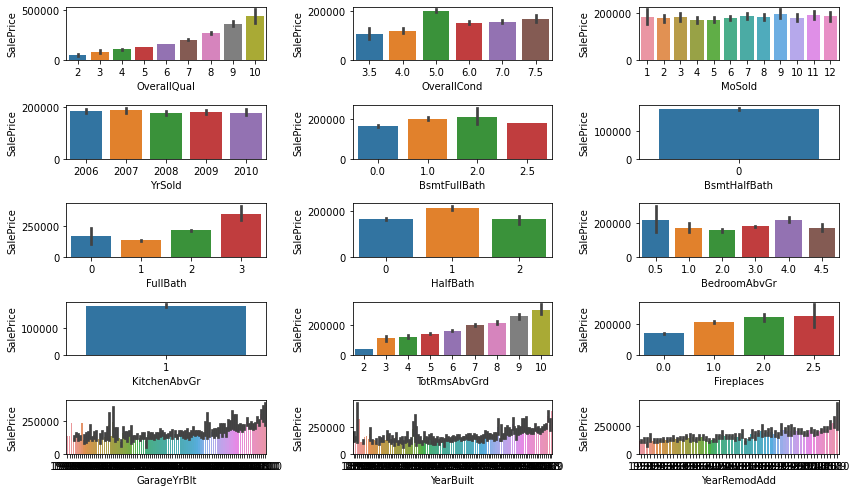

In [25]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath',
                             'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
                             'YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**
Following are the observations from the plots.
- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

- 'OverallCond' : SalePrice is highest for rating 5

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

- 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice 

- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold' : We need to extract new features to identify any trend

- 'BsmtFullBath', 'KitchenAbvGr' : Need further inspection for meaningful insight

In [26]:
housing_df[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [27]:
print(housing_df['BsmtFullBath'].value_counts())
print(housing_df['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [28]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [29]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [30]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    housing_df[feature] = 2021 - housing_df[feature]

In [31]:
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']]

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
0,18.0,18,18,13
1,45.0,45,45,14
2,20.0,20,19,13
3,23.0,106,51,15
4,21.0,21,21,13
...,...,...,...,...
1455,22.0,22,21,14
1456,43.0,43,33,11
1457,80.0,80,15,11
1458,71.0,71,25,11


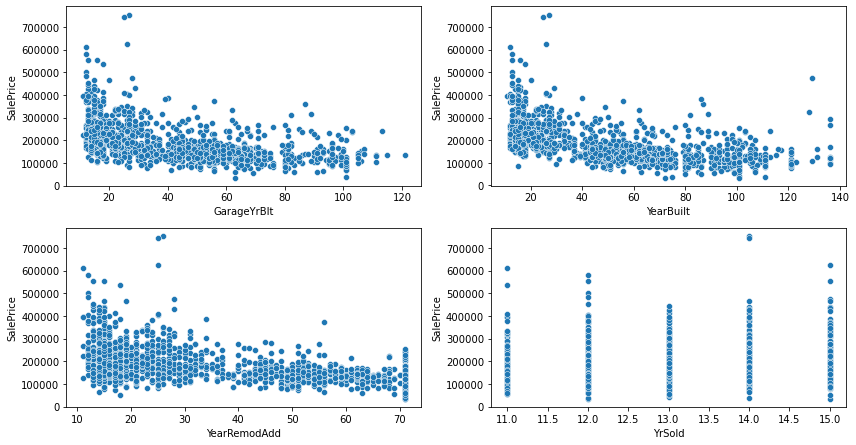

In [32]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(housing_df[feature], housing_df['SalePrice'])
    plt.tight_layout()

**Comment:**
- SalePrice is more for recently built garages
- SalePrice is more more recently build houses i.e. lower value of year built
- Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 
- YrSold still does not show any significant trend

#### Missing Value Handling - Numerical Features

In [33]:
print('Percentage of null values')
print('=========================')
for feature in housing_df.select_dtypes(exclude='object').columns:
    if housing_df[feature].isnull().sum()>0:
        print(feature, ' : ', round((housing_df[feature].isnull().sum()/len(housing_df)),2)*100)

Percentage of null values
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [34]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [35]:
print('Percentage of null values')
print('=========================')
for feature in housing_df.select_dtypes(exclude='object').columns:
    if housing_df[feature].isnull().sum()>0:
        print(feature, ' : ', round((housing_df[feature].isnull().sum()/len(housing_df)),2)*100)

Percentage of null values
LotFrontage  :  18.0
GarageYrBlt  :  6.0


In [36]:
# Checking the number of remaining columns
housing_df.columns.shape

(73,)

**Comment:**

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
- TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
- Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [37]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], inplace= True, axis=1)

In [38]:
#Checking the number of remaining column in Dataframe
housing_df.columns.shape

(69,)

### Analyzing Categorical Features

In [39]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feature in categorical_df.select_dtypes(include='object').columns:
    if housing_df[feature].isnull().sum()>0:
        print(feature, ':', round(housing_df[feature].isnull().sum()/len(housing_df)*100,2))

Feature : Percentage of Missing Value
Alley : 93.8
BsmtQual : 2.55
BsmtCond : 2.55
BsmtExposure : 2.62
BsmtFinType1 : 2.55
BsmtFinType2 : 2.62
Electrical : 0.07
FireplaceQu : 47.25
GarageType : 5.58
GarageFinish : 5.58
GarageQual : 5.58
GarageCond : 5.58
PoolQC : 99.52
Fence : 80.65
MiscFeature : 96.28


In [41]:
housing_df['Electrical'].isnull().sum()

1

In [42]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

**Comment:**
- For 'Alley', Nan means 'No access to alley'
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
- MiscFeature - Nan means no additional features mentioned.

All these features will be imputed with meaningful values in place of missing data.

In [43]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
                           'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [44]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis = 1)

# Checking after imputation
housing_df[mv_categorical_features].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64

In [45]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [46]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feature in housing_df.columns:
    if housing_df[feature].isnull().sum()>0:
        print(feature, ':', round(housing_df[feature].isnull().sum()/len(housing_df)*100,2))

Feature : Percentage of Missing Value
LotFrontage : 17.71


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [47]:
housing_df.shape

(1451, 68)

**Encoding For Categorical Variables**
**Ordered Features -- to be label encoded**
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded**
'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [48]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(housing_df['SalePrice'], housing_df[feature])
        plt.tight_layout()

Dividing the ordinal features into smaller segments and visualizing their impact on SalePrice.

#### Analyzing Ordered Features

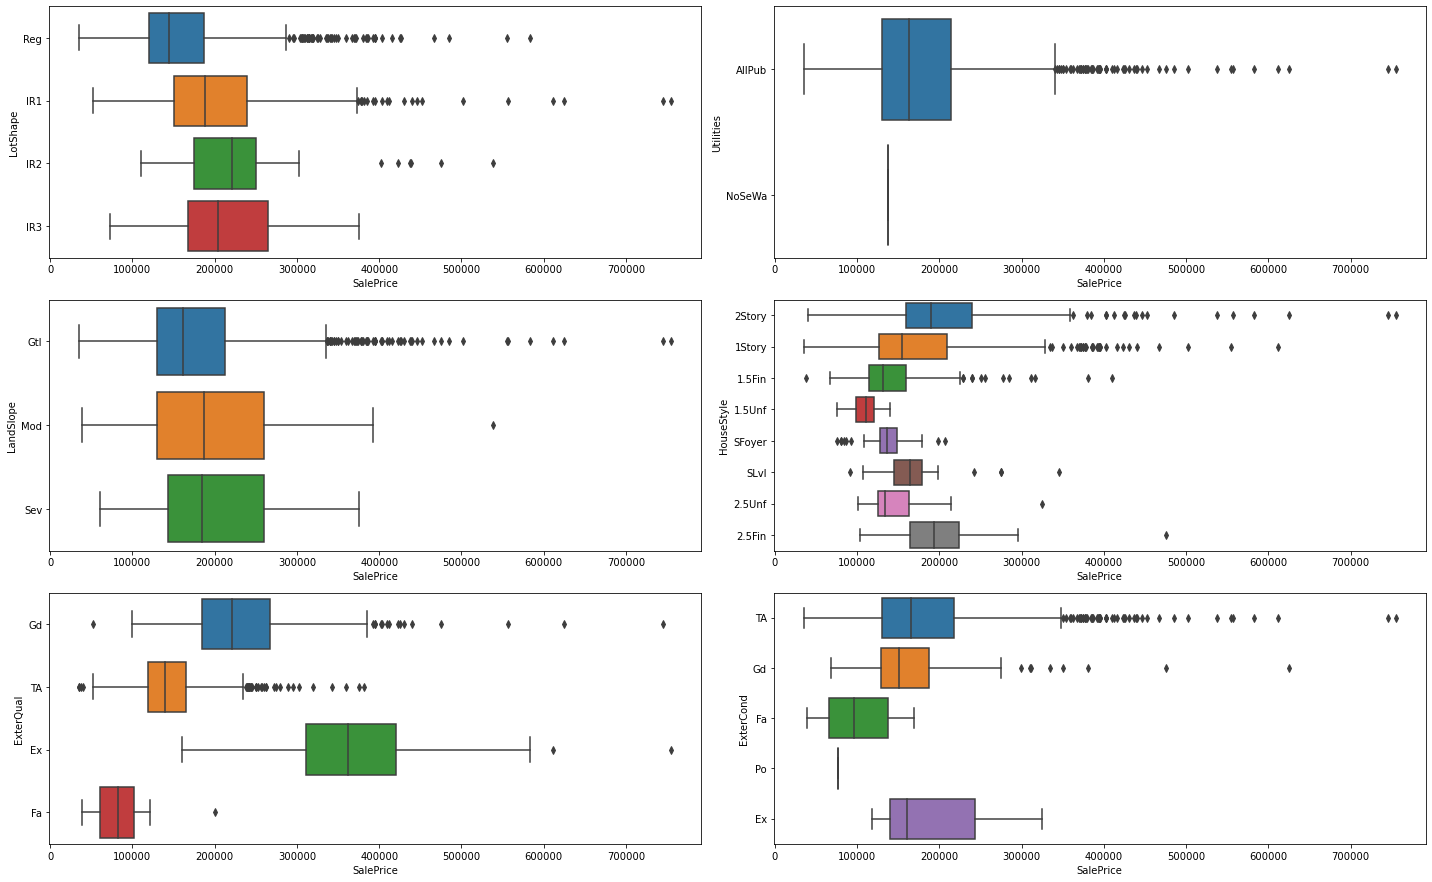

In [49]:
exterior_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle',  'ExterQual', 'ExterCond']
generate_boxplot(exterior_features)

**Comment:**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

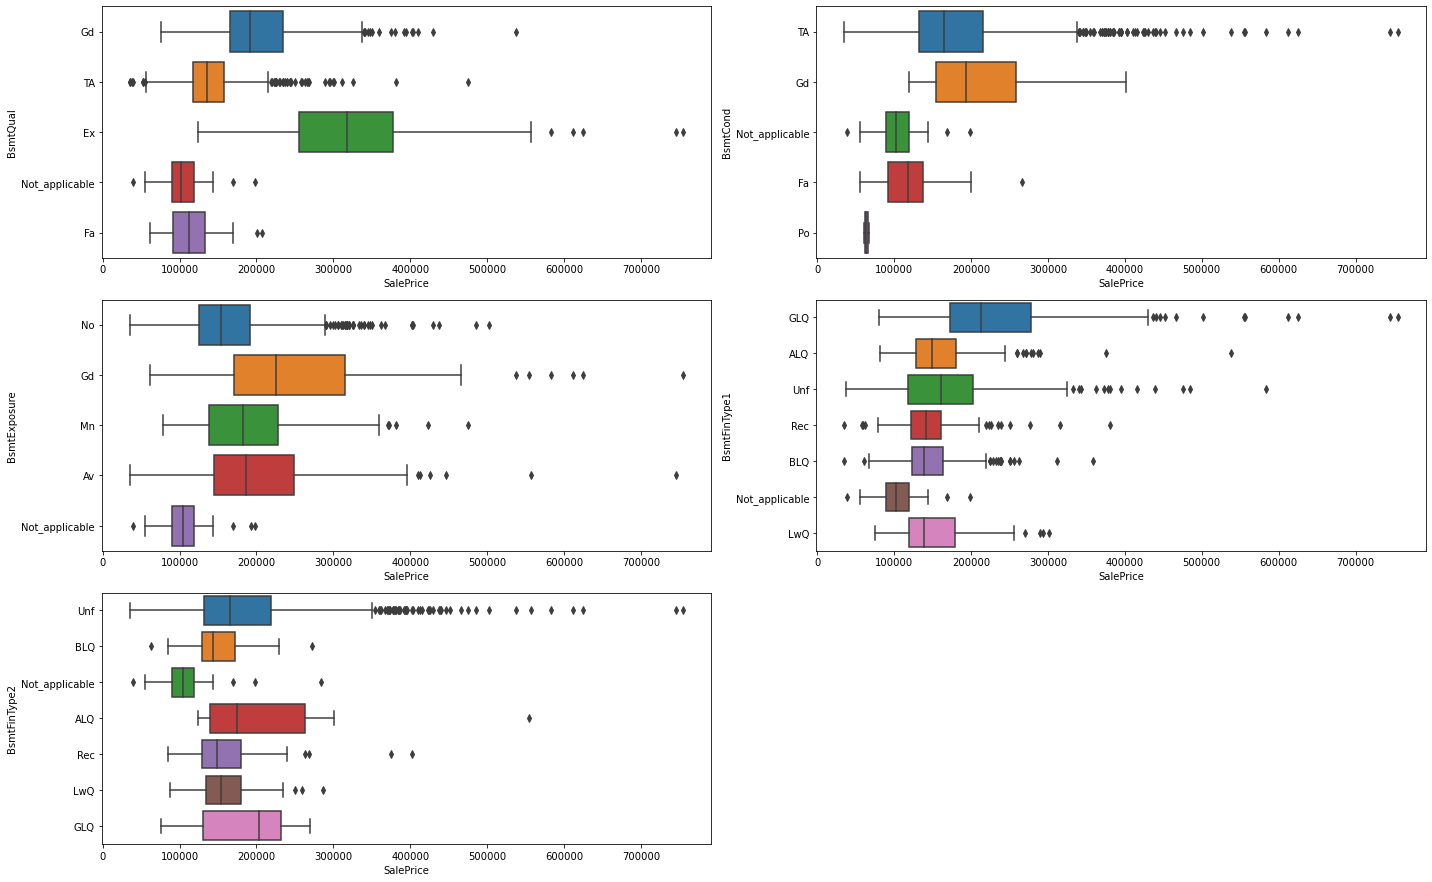

In [50]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
generate_boxplot(basement_features)

**Comment:**

- Houses with excellent quality basement have the highest SalePrice
- Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- A lot of houses have unfinished basment or no basement (label = Not_applicable)

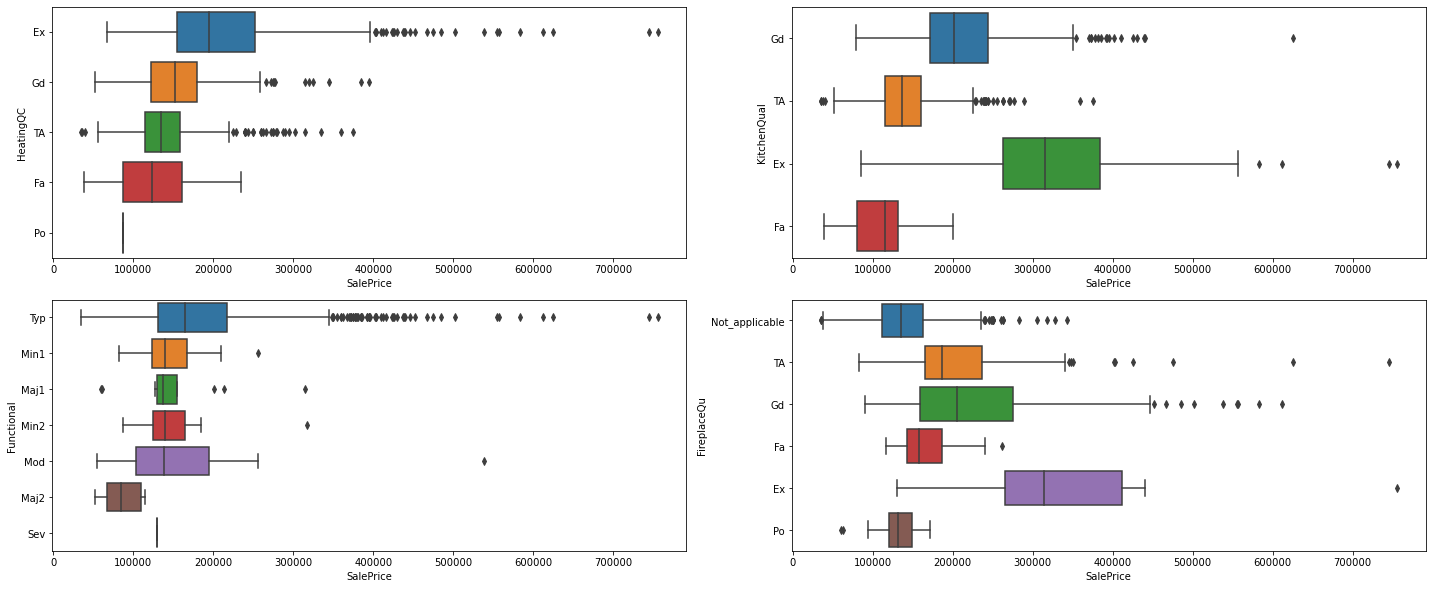

In [51]:
int_feature = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
generate_boxplot(int_feature)

**Comment:**

- Houses having excellent heating quality and kitchen quality have the highest SalePrice
- Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- SalePrice range in largest for houses with average fireplace quality.

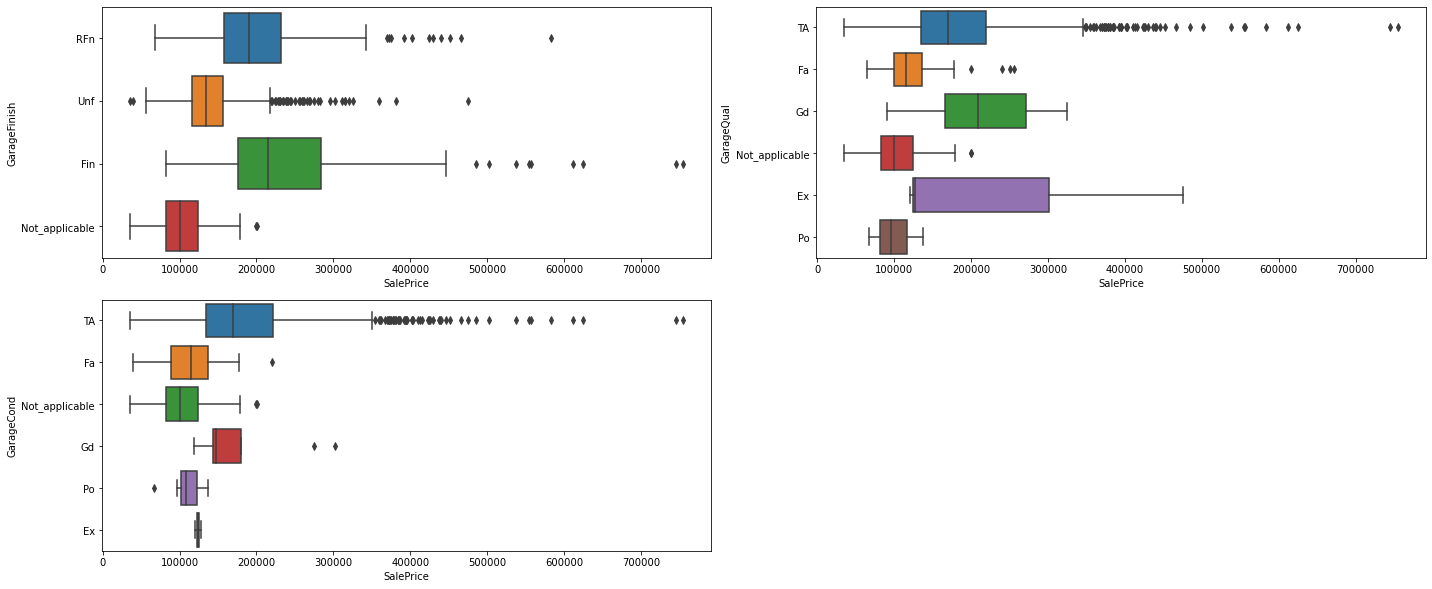

In [52]:
garage_features = ['GarageFinish', 'GarageQual', 'GarageCond']

generate_boxplot(garage_features)

**Comment:**

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage quality and condition.
- There are very few houses with excellect condition of garage.

#### Encoding Categorical Features 

In [53]:

housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [54]:
housing_df['BsmtQual'].value_counts()

3    648
4    611
5    120
0     37
2     35
Name: BsmtQual, dtype: int64

In [55]:
# Checking the features after encoding

housing_df[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional',
            'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 247.7 KB


#### Analyzing Unordered Featues

In [56]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical','GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

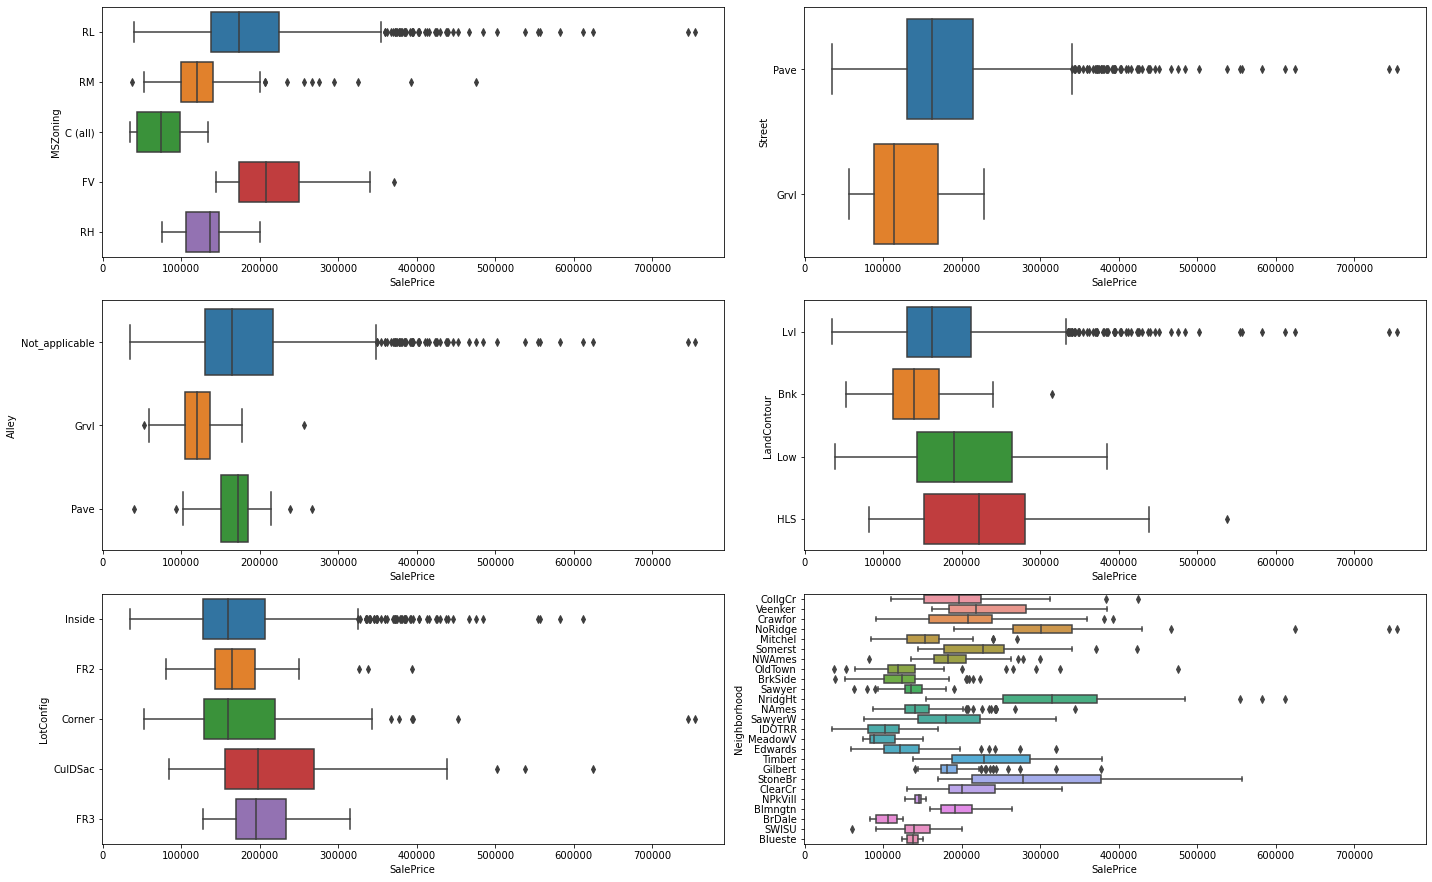

In [57]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Comment:**

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

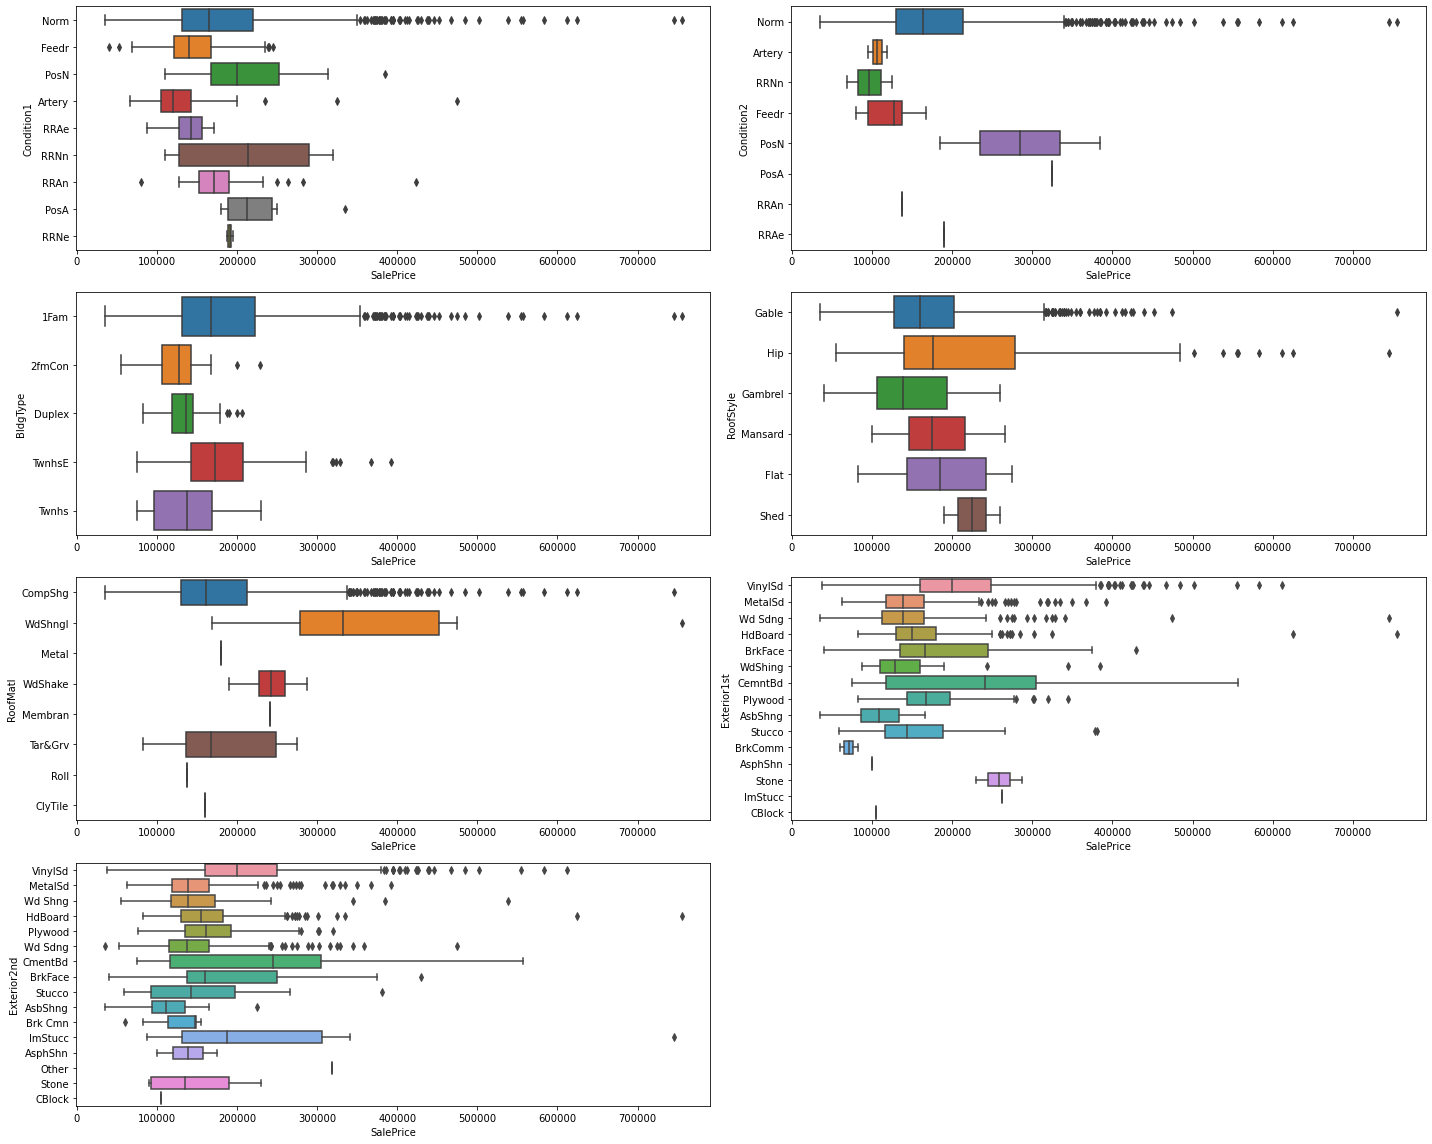

In [58]:
generate_boxplot(['Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Comment:**
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.



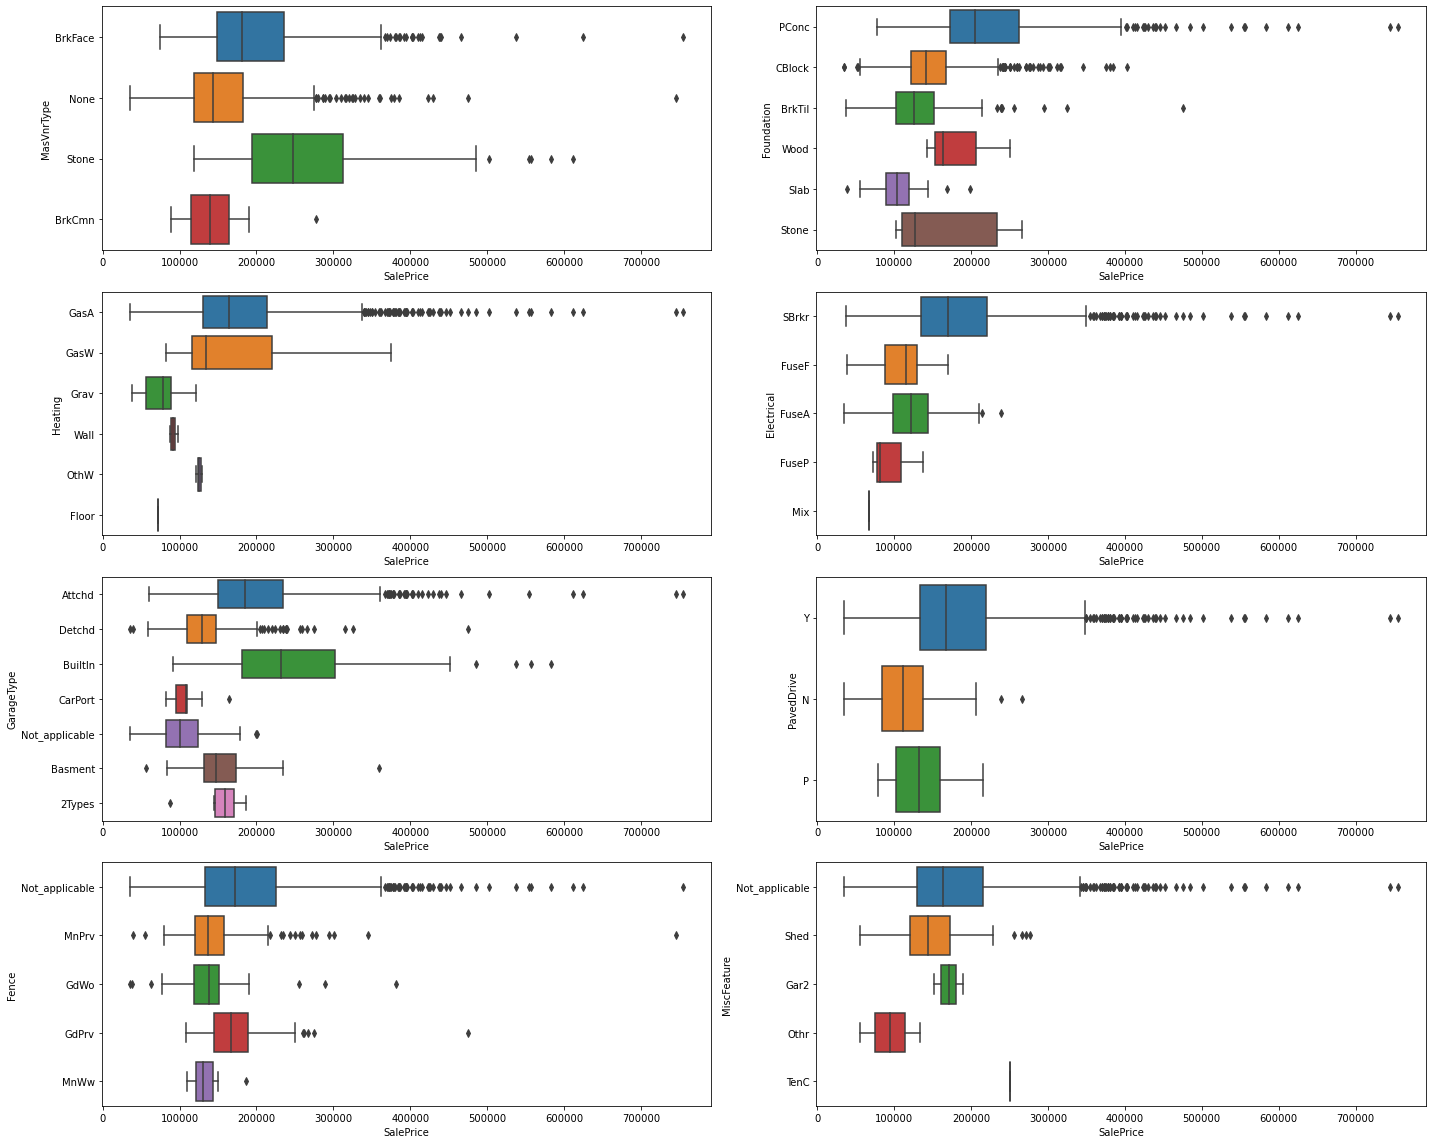

In [59]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Comment:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

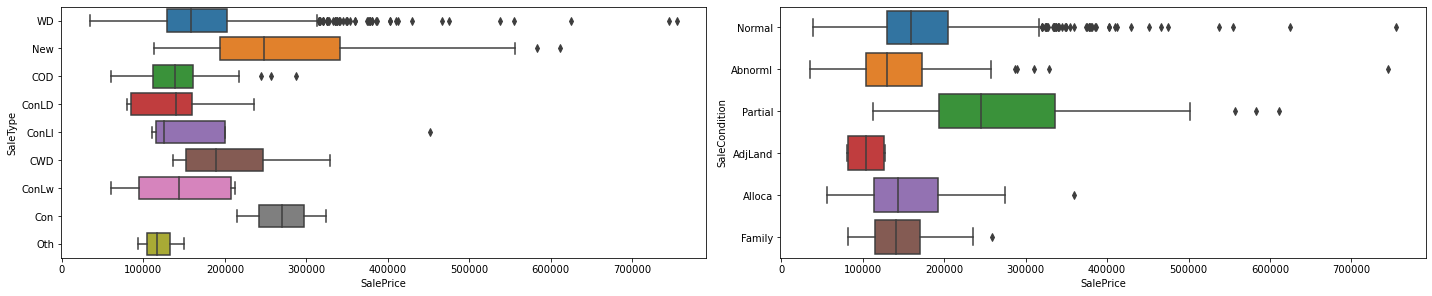

In [60]:
generate_boxplot(['SaleType','SaleCondition'])

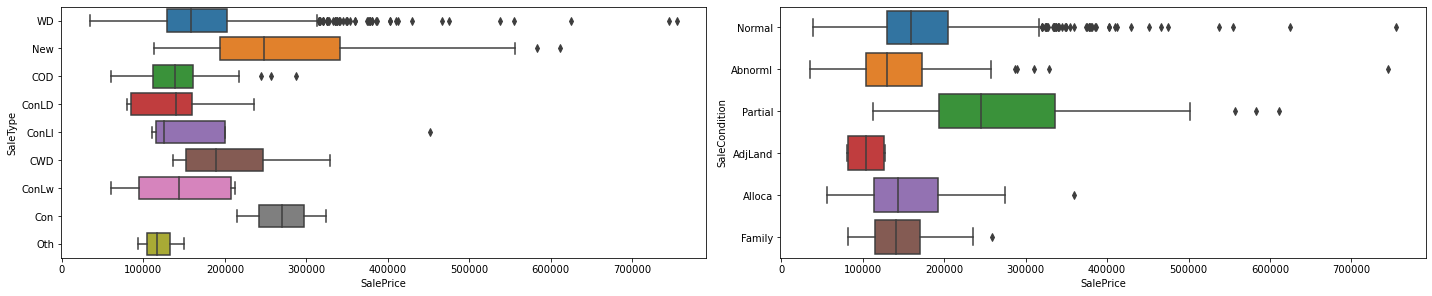

In [61]:
generate_boxplot(['SaleType','SaleCondition'])

#### Encoding Categorical Variables

In [62]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [63]:
dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Not_applicable,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [64]:
dummy_df.shape

(1451, 144)

**Comment:**

- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [65]:
dummy_df['MSZoning_FV'].value_counts()[0]

1389

In [66]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [67]:
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1451, 52)


In [68]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[1]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['Street_Pave', 'Condition2_Norm', 'RoofMatl_CompShg', 'Heating_GasA', 'MiscFeature_Not_applicable']
5


In [69]:
dummy_df = dummy_df.drop(dummies_to_drop, 1)
print(dummy_df.shape)

(1451, 47)


In [70]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df, dummy_df], axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features, axis=1)

In [71]:
housing_df.shape

(1451, 92)

### Splitting into Train and Test Data

In [72]:
X = housing_df.drop(['SalePrice'], axis = 1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,0,1,0,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,0,1,0,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,0,1,0,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,0,1,0,1,0,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,0,1,0,1,0,1,1,0


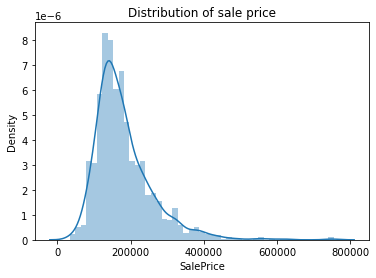

In [73]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of sale price')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Comment:** Since SalePrice is highly left skewed,  checking the distribution of transformed SalePrice. 

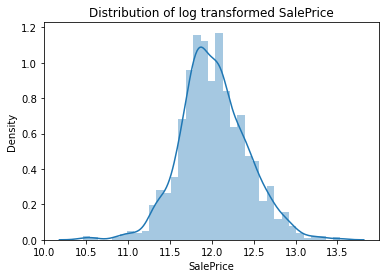

In [74]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [75]:
y = np.log(housing_df['SalePrice'])
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64

In [76]:
X.shape

(1451, 91)

In [77]:
y.shape

(1451,)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1160, 91)
(1160,)
(291, 91)
(291,)


In [80]:
X['LotFrontage'].isnull().any()

True

In [81]:
si = SimpleImputer(missing_values=np.nan, strategy = 'mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [82]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [83]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [84]:
X_train.values

array([[6.000000e+01, 8.000000e+01, 1.040000e+04, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.000000e+01, 6.000000e+01, 6.600000e+03, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.450000e+02, 3.300000e+01, 4.456000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [1.200000e+02, 6.904341e+01, 5.271000e+03, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.000000e+01, 6.000000e+01, 1.044000e+04, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [6.000000e+01, 7.000000e+01, 8.400000e+03, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [85]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,55.616379,69.043410,9629.257759,1.942241,2.998276,0.060345,1.673276,6.119828,5.552155,49.566379,...,0.057759,0.264655,0.057759,0.922414,0.112069,0.803448,0.078448,0.870690,0.826724,0.080172
std,37.654305,17.806431,3586.054619,1.408446,0.058722,0.272045,1.951785,1.372208,0.955026,29.986780,...,0.233387,0.441340,0.233387,0.267635,0.315587,0.397562,0.268992,0.335688,0.378649,0.271677
min,20.000000,27.500000,1481.500000,0.000000,1.000000,0.000000,0.000000,2.000000,3.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,0.000000,3.000000,0.000000,0.000000,5.000000,5.000000,21.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,50.000000,69.043410,9458.500000,3.000000,3.000000,0.000000,1.000000,6.000000,5.000000,48.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,70.000000,79.000000,11588.000000,3.000000,3.000000,0.000000,3.000000,7.000000,6.000000,67.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,145.000000,111.500000,17673.500000,3.000000,3.000000,2.000000,7.000000,10.000000,7.500000,136.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
X_test.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,291.000000,291.000000,291.000000,291.000000,291.0,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,53.092784,69.305157,9699.323024,1.931271,3.0,0.072165,1.584192,5.996564,5.527491,51.109966,...,0.065292,0.274914,0.048110,0.896907,0.092784,0.817869,0.096220,0.862543,0.804124,0.099656
std,37.046871,17.915150,3630.665532,1.417411,0.0,0.296442,1.910666,1.393330,1.002205,30.545076,...,0.247466,0.447240,0.214367,0.304604,0.290629,0.386617,0.295401,0.344922,0.397557,0.300057
min,20.000000,27.500000,1680.000000,0.000000,3.0,0.000000,0.000000,2.000000,3.500000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7729.000000,0.000000,3.0,0.000000,0.000000,5.000000,5.000000,19.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,50.000000,69.043410,9503.000000,3.000000,3.0,0.000000,0.000000,6.000000,5.000000,50.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,70.000000,78.500000,11629.500000,3.000000,3.0,0.000000,3.000000,7.000000,6.000000,69.500000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,145.000000,111.500000,17673.500000,3.000000,3.0,2.000000,7.000000,9.000000,7.500000,136.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [88]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [89]:
# Check the feature after transformation
X_tr_scaled.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,...,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03
mean,1.043945e-16,2.216678e-16,-1.209760e-16,9.207194e-17,-7.284044e-16,-5.508046e-17,-1.462432e-16,2.270334e-16,-4.691649e-16,2.019457e-17,...,4.627524e-16,2.742059e-16,6.651767e-17,1.014514e-16,2.044342e-16,-2.832983e-17,2.610938e-16,-7.656711e-19,-4.886895e-16,-6.692922e-16
std,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,...,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00,1.000431e+00
min,-9.462860e-01,-2.334063e+00,-2.273047e+00,-1.379591e+00,-3.404409e+01,-2.219149e-01,-8.576750e-01,-3.003630e+00,-2.149722e+00,-1.286667e+00,...,-2.475867e-01,-5.999218e-01,-2.475867e-01,-3.448027e+00,-3.552655e-01,-2.021811e+00,-2.917641e-01,-2.594867e+00,-2.184295e+00,-2.952292e-01
25%,-9.462860e-01,-5.080923e-01,-5.940166e-01,-1.379591e+00,2.937367e-02,-2.219149e-01,-8.576750e-01,-8.164292e-01,-5.784066e-01,-9.530433e-01,...,-2.475867e-01,-5.999218e-01,-2.475867e-01,2.900209e-01,-3.552655e-01,4.946061e-01,-2.917641e-01,3.853762e-01,4.578136e-01,-2.952292e-01
50%,-1.492207e-01,0.000000e+00,-4.763770e-02,7.513353e-01,2.937367e-02,-2.219149e-01,-3.451026e-01,-8.736233e-02,-5.784066e-01,-5.225819e-02,...,-2.475867e-01,-5.999218e-01,-2.475867e-01,2.900209e-01,-3.552655e-01,4.946061e-01,-2.917641e-01,3.853762e-01,4.578136e-01,-2.952292e-01
75%,3.821562e-01,5.593981e-01,5.464465e-01,7.513353e-01,2.937367e-02,-2.219149e-01,6.800422e-01,6.417046e-01,4.691369e-01,5.816276e-01,...,-2.475867e-01,1.666884e+00,-2.475867e-01,2.900209e-01,-3.552655e-01,4.946061e-01,-2.917641e-01,3.853762e-01,4.578136e-01,-2.952292e-01
max,2.374819e+00,2.385369e+00,2.244169e+00,7.513353e-01,2.937367e-02,7.132980e+00,2.730332e+00,2.828905e+00,2.040452e+00,2.883634e+00,...,4.038989e+00,1.666884e+00,4.038989e+00,2.900209e-01,2.814796e+00,4.946061e-01,3.427427e+00,3.853762e-01,4.578136e-01,3.387199e+00


In [90]:
# Check the feature after transformation
X_te_scaled.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
count,291.000000,291.000000,291.000000,291.000000,2.910000e+02,291.000000,291.000000,291.000000,291.000000,291.000000,...,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,-0.067049,0.014706,0.019547,-0.007792,2.937367e-02,0.043468,-0.045662,-0.089868,-0.025836,0.051498,...,0.032293,0.023255,-0.041360,-0.095345,-0.061136,0.036290,0.066096,-0.024279,-0.059713,0.071748
std,0.984293,1.006540,1.012877,1.006799,7.645932e-17,1.090149,0.979355,1.015831,1.049853,1.019057,...,1.060782,1.013806,0.918901,1.138624,0.921311,0.972890,1.098651,1.027952,1.050390,1.104939
min,-0.946286,-2.334063,-2.217670,-1.379591,2.937367e-02,-0.221915,-0.857675,-3.003630,-2.149722,-1.253305,...,-0.247587,-0.599922,-0.247587,-3.448027,-0.355266,-2.021811,-0.291764,-2.594867,-2.184295,-0.295229
25%,-0.946286,-0.508092,-0.530131,-1.379591,2.937367e-02,-0.221915,-0.857675,-0.816429,-0.578407,-1.019768,...,-0.247587,-0.599922,-0.247587,0.290021,-0.355266,0.494606,-0.291764,0.385376,0.457814,-0.295229
50%,-0.149221,0.000000,-0.035223,0.751335,2.937367e-02,-0.221915,-0.857675,-0.087362,-0.578407,0.014467,...,-0.247587,-0.599922,-0.247587,0.290021,-0.355266,0.494606,-0.291764,0.385376,0.457814,-0.295229
75%,0.382156,0.531306,0.558024,0.751335,2.937367e-02,-0.221915,0.680042,0.641705,0.469137,0.665034,...,-0.247587,1.666884,-0.247587,0.290021,-0.355266,0.494606,-0.291764,0.385376,0.457814,-0.295229
max,2.374819,2.385369,2.244169,0.751335,2.937367e-02,7.132980,2.730332,2.099838,2.040452,2.883634,...,4.038989,1.666884,4.038989,0.290021,2.814796,0.494606,3.427427,0.385376,0.457814,3.387199


### Initial Feature Selection with RFE

In [93]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, step = n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [94]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'Exterior1st_HdBoard', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'Fence_Not_applicable', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'Cen

In [95]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train, y_train, cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1, 1), X_train_ols).fit()
    print(lin_reg.summary())

In [96]:
build_regressor(X_tr_scaled, y_train, top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     249.6
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:51:06   Log-Likelihood:                 801.12
No. Observations:                1160   AIC:                            -1512.
Df Residuals:                    1115   BIC:                            -1285.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [97]:
build_regressor(X_tr_scaled, y_train, top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     254.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:51:07   Log-Likelihood:                 799.61
No. Observations:                1160   AIC:                            -1511.
Df Residuals:                    1116   BIC:                            -1289.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [98]:
build_regressor(X_tr_scaled, y_train, top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     254.9
Date:                Fri, 07 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:51:10   Log-Likelihood:                 799.61
No. Observations:                1160   AIC:                            -1511.
Df Residuals:                    1116   BIC:                            -1289.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Comment:** By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 45 features seem to be optimum as models with 50 and 55 features also have the same adjusted R-squared value on the training data.

In [99]:
X_train_rfe = X_tr_scaled[top_45]
X_test_rfe = X_te_scaled[top_45]

In [100]:
# Reusable code block for cross-validation, Model building, and Model evaluation

def build_model(X_train, y_train, X_test, params, model = 'ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    model_cv = GridSearchCV(estimator = estimator_model,
                            param_grid = params,
                            scoring = 'neg_mean_absolute_error',
                            cv=5,
                            return_train_score = True,
                            verbose = 1, n_jobs=-1)
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_['alpha']
    print('Optimum alpha for %s is %f' %(model, alpha))
    final_model = model_cv.best_estimator_
    
    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
    
    #Model evaluation
    print(model, 'Regression with', alpha)
    print('===================================')
    print('R2_score (train) :', r2_score(y_train, y_train_pred))
    print('R2_score (test) :', r2_score(y_test,y_test_pred))
    print('RMSE (train) :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) :', np.sqrt(mean_squared_error(y_test,y_test_pred)))
    
    return final_model, y_test_pred

### Ridge Regression

In [101]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 7.000000
ridge Regression with 7.0
R2_score (train) : 0.9077334882376522
R2_score (test) : 0.8925769957399065
RMSE (train) : 0.12136324489244739
RMSE (test) : 0.13060949526791424


***Comment:*** Ridge regression model was able to acheieve R2 score of 0.89257 on the test data i.e. 89.26% of the variance in test data can be explained by the model. Root Mean Square Error = 0.1306 on test data, that means the prediction made by the model can off  by 0.1306 unit.

### Lasso Regression

In [102]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso Regression with 0.001
R2_score (train) : 0.9070430079508522
R2_score (test) : 0.8943856893113162
RMSE (train) : 0.12181651191342997
RMSE (test) : 0.12950528400000438


***Comment:*** Lasso regression model was able to acheieve R2 score of 0.8943 on the test data i.e. 89.43% of the variance in test data can be explained by the model. Root Mean Square Error = 0.1295 on test data, that means the prediction made by the model can off  by 0.1295 unit.

In [103]:
model_coefficients = pd.DataFrame(index= X_test_rfe.columns)
#model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=7.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
# displaying the DataFrame
model_coefficients

,Ridge (alpha=7.0),Lasso (alpha=0.001)
MSSubClass,-0.005736,-0.002832
LotArea,0.039988,0.038946
OverallQual,0.088682,0.091788
OverallCond,0.048199,0.047064
YearBuilt,-0.034266,-0.035417
YearRemodAdd,-0.012473,-0.012615
BsmtFinSF1,0.047901,0.045513
BsmtFinSF2,0.000000,0.000000
BsmtUnfSF,0.015882,0.011648
HeatingQC,0.013443,0.013210


In [104]:
test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[136224 239461 161660 126687 179803]


### Final Model

Lasso Regression produced slightly better R2 score than Ridge Regression. Choosing Lasso as the final model.

In [105]:
# 45 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending = False)

,Lasso (alpha=0.001)
1stFlrSF,0.123398
2ndFlrSF,0.108423
OverallQual,0.091788
OverallCond,0.047064
BsmtFinSF1,0.045513
LotArea,0.038946
SaleCondition_Normal,0.026256
Condition1_Norm,0.025759
MSZoning_RL,0.025702
SaleType_New,0.024739


In [106]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending = False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'LotArea', 'SaleCondition_Normal', 'Condition1_Norm', 'MSZoning_RL',
       'SaleType_New'],
      dtype='object')

### Summary

- First the housing data is read and analyzed dividing the features into numerical and categorical types.


- SalePrice is the target column here.


- All the features are then analyzed, missing data handling, outlier detection, data cleaning are done. Trend of SalePrice is 
observed for change in individual features.


- New features are extracted, redundant features dropped and categorical features are encoded accordingly.


- Then the data in split into train and test data and feature scaling is performed.


- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.


- Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.


- Top 45 features are selected through RFE and adjusted R-square. 45 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_TwnhsE', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 10.0 for ridge and 0.001 for lasso model.


- Model evaluation is done with R2 score and Root Mean Square Error.


- Lasso Regression is chosen as final model for having slightly better R-square value on test data.


- Out of 45 features in the final model, top 10 features in order of descending importance are: -  ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond','LotArea', 'MSZoning_RL', 'SaleCondition_Normal', 'Condition1_Norm','SaleType_New']


- Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.121192 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. 


- Predicted value of SalePrice is tranformed into its original scale by performing antilog. 



### Subjective Questions Code

***Question 1***

- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [107]:
print('***Optimal value of alpha in Ridge regression model***')
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'ridge')
print('\n=====================================================================\n')
print('***Optimal value of alpha in Lasso regression model***')
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'lasso')

***Optimal value of alpha in Ridge regression model***
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 7.000000
ridge Regression with 7.0
R2_score (train) : 0.9077334882376522
R2_score (test) : 0.8925769957399065
RMSE (train) : 0.12136324489244739
RMSE (test) : 0.13060949526791424


***Optimal value of alpha in Lasso regression model***
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for lasso is 0.001000
lasso Regression with 0.001
R2_score (train) : 0.9070430079508522
R2_score (test) : 0.8943856893113162
RMSE (train) : 0.12181651191342997
RMSE (test) : 0.12950528400000438


In [108]:
# Let see what changes happens when we double the optimal value of alpha

print('***Double the optimal value of alpha in Ridge regression model***')
params = {'alpha': [14]}
ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'ridge')
print('\n=====================================================================\n')
print('***Double the optimal value of alpha in Lasso regression model***')
params = {'alpha': [0.002]}
lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model = 'lasso')

***Double the optimal value of alpha in Ridge regression model***
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for ridge is 14.000000
ridge Regression with 14
R2_score (train) : 0.9075497000706525
R2_score (test) : 0.8932065777861038
RMSE (train) : 0.121484058128992
RMSE (test) : 0.13022619641028516


***Double the optimal value of alpha in Lasso regression model***
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimum alpha for lasso is 0.002000
lasso Regression with 0.002
R2_score (train) : 0.9061844218483973
R2_score (test) : 0.8945742513318071
RMSE (train) : 0.1223777906437768
RMSE (test) : 0.12938962407067045


In [109]:
model_coefficients['Ridge (alpha = 14.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_final_model.coef_
pd.set_option('display.max_columns', None)
model_coefficients

,Ridge (alpha=7.0),Lasso (alpha=0.001),Ridge (alpha = 14.0),Lasso (alpha = 0.002)
MSSubClass,-0.005736,-0.002832,-0.005282,-0.000000
LotArea,0.039988,0.038946,0.040246,0.038637
OverallQual,0.088682,0.091788,0.088580,0.094227
OverallCond,0.048199,0.047064,0.047503,0.045067
YearBuilt,-0.034266,-0.035417,-0.032270,-0.035332
YearRemodAdd,-0.012473,-0.012615,-0.012812,-0.013400
BsmtFinSF1,0.047901,0.045513,0.048183,0.043479
BsmtFinSF2,0.000000,0.000000,0.000000,0.000000
BsmtUnfSF,0.015882,0.011648,0.016142,0.008439
HeatingQC,0.013443,0.013210,0.013620,0.013546


In [110]:
pd.DataFrame({'Ridge (alpha=7.0)':model_coefficients[['Ridge (alpha=7.0)']].sort_values(by='Ridge (alpha=7.0)', ascending=False).index,
              'Ridge (alpha=14.0)':model_coefficients[['Ridge (alpha = 14.0)']].sort_values(by='Ridge (alpha = 14.0)', ascending=False).index,
              'Lasso (alpha=0.001)':model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index,
              'Lasso (alpha=0.002)':model_coefficients[['Lasso (alpha = 0.002)']].sort_values(by='Lasso (alpha = 0.002)', ascending=False).index})

,Ridge (alpha=7.0),Ridge (alpha=14.0),Lasso (alpha=0.001),Lasso (alpha=0.002)
0,1stFlrSF,1stFlrSF,1stFlrSF,1stFlrSF
1,2ndFlrSF,2ndFlrSF,2ndFlrSF,2ndFlrSF
2,OverallQual,OverallQual,OverallQual,OverallQual
3,SaleType_New,BsmtFinSF1,OverallCond,OverallCond
4,OverallCond,OverallCond,BsmtFinSF1,BsmtFinSF1
5,BsmtFinSF1,SaleType_New,LotArea,LotArea
6,LotArea,LotArea,SaleCondition_Normal,Condition1_Norm
7,MSZoning_RL,MSZoning_RL,Condition1_Norm,MSZoning_RL
8,SaleCondition_Normal,SaleCondition_Normal,MSZoning_RL,SaleCondition_Normal
9,Condition1_Norm,Condition1_Norm,SaleType_New,SaleType_New


In [111]:
model_coefficients[['Lasso (alpha = 0.002)']].sort_values(by='Lasso (alpha = 0.002)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'LotArea', 'Condition1_Norm', 'MSZoning_RL', 'SaleCondition_Normal',
       'SaleType_New'],
      dtype='object')

In [112]:
# number of feature in model when optimal alpha is double (alpha = 0.002) for lasso regression
len([i for i in lasso_final_model.coef_ if i != 0])

38

In [113]:
# features having 0 coefficients value in lasso regression
model_coefficients['Lasso (alpha = 0.002)'][model_coefficients['Lasso (alpha = 0.002)'] == 0].index

Index(['MSSubClass', 'BsmtFinSF2', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace',
       'GarageType_Detchd', 'GarageType_Not_applicable',
       'SaleCondition_Partial'],
      dtype='object')

##### Ridge Regression comments with optimal alpha value and with double optimal alpha value
- After we double the optimal value of alpha for ridge regression, we can see that there is very slight chnage in R2 score and RMSE value for train and test data.
- The top 10 feature with optimal value of alpha(alpha = 10.0) are-
['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'SaleType_New','OverallCond', 'LotArea', 'MSZoning_RL, 'SaleCondition_Normal','Condition1_Norm']
- The top 10 feature with optimal value of alpha(alpha = 10.0) are-
['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond','SaleType_New', 'LotArea', 'MSZoning_RL', 'SaleCondition_Normal','Condition1_Norm']
- We can see that the top 10 features are same. Just the position of two features i.e. 'SaleType_New','OverallCond' is changed.
- So we can conclude that for this model after doubling of optimal alpha value there is very minor change in the model.

##### Lasso Regression comments with optimal alpha value and with double optimal alpha value
- After we double the optimal value of alpha for lasso regression, we can see that there is very slight chnage in R2 score and RMSE value for train and test data.
- The top 10 feature with optimal value of alpha(alpha = 0.002)and double of optmal value of alpha(alpha=0.002) are same-
['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond', 'LotArea', 'MSZoning_RL', 'SaleCondition_Normal', 'Condition1_Norm','SaleType_New']
- We can see that the top 10 features are same. But there are many feature in alpha value 0.002, which having 0 coefficients.   The variable are - ['Exterior1st_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace','MasVnrType_None', 'MasVnrType_Stone', 'GarageType_Not_applicable','SaleCondition_Partial']
- So for alpha 0.001 in lasso regression there are 45 features and for alpha 0.002 there are 38 features.
- There is little suffling of variable when arranged in descending order.
- So we can conclude that for lasso model after doubling of optimal alpha value the model is changed slightly.



##### Overall the features in both ridge and lasso model for optimal alpha and double optimal alpha, when they arranged in descending  order, the top 10 fetures are same in  all 4 model just some suffling is there.

***Question 2***

- You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

- We will use lasso regression with alpha value 0.001 as the lasso regression is providing R2 score as 0.8992 i.e. 89.92%  of the variance in the test data can be explained by the mode whereas in ridge regression with alpha value 10, the R2 score is 0.89875 i.e 89.88% of the variance in the test data can be explained by the model.
- The RMSE value(test data) for lasso model is 0.1265 which means the prediction made by the model can off by 0.1265 unit. And RMSE value(test data) for ridge model is 0.1268 which means the prediction made by the model can off by 0.1268 unit. So the RMSE value is better in lasso model.
- By this we can conclude that the Lasso model is performing slightly better than ridge model.

***Question 3***

- After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [115]:
# The top five most important predictor variables in lasso model
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending = False)[:5]

,Lasso (alpha=0.001)
1stFlrSF,0.123398
2ndFlrSF,0.108423
OverallQual,0.091788
OverallCond,0.047064
BsmtFinSF1,0.045513


In [116]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond'], axis = 1)

In [117]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond'], axis = 1)

In [118]:
print('***Lasso regression model after dropping top 5 predictor variable***')
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso_final_model_2, y_test_predicted = build_model(X_train_new, y_train, X_test_new, params, model = 'lasso')

***Lasso regression model after dropping top 5 predictor variable***
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for lasso is 0.010000
lasso Regression with 0.01
R2_score (train) : 0.8092793196125415
R2_score (test) : 0.8021474004532649
RMSE (train) : 0.17448738032900263
RMSE (test) : 0.17725438368729166


In [119]:
lasso_final_model_2.coef_

array([ 0.        ,  0.06706958, -0.        , -0.03259344,  0.        ,
        0.00152461,  0.02258997,  0.02244867,  0.03520086,  0.08845951,
        0.04070527,  0.06774115, -0.01768384,  0.06417342,  0.07756419,
        0.        ,  0.00684393, -0.01171685, -0.        ,  0.01416493,
       -0.00332587,  0.        ,  0.01316596,  0.        , -0.02070702,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.00387394,  0.01817857,  0.01389207, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [120]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
#model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_final_model_2.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.088460
GarageArea,0.077564
KitchenQual,0.067741
LotArea,0.067070
FireplaceQu,0.064173


In [121]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
#model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_final_model_2.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5).index

Index(['FullBath', 'GarageArea', 'KitchenQual', 'LotArea', 'FireplaceQu'], dtype='object')

***Question 4***

- How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

As Per the Occam’s Razor rule, when there are two models which show similar performance in the finite training or test data, then we should pick the one which is simple or less complex due to the following reasons: -

* Simpler models are usually more ’generic’ and are more widely applicable. 
* When the model is simple, it requires fewer training samples for effective training of the model than the more complex ones, and hence they are easier to train. 
* Simpler models are more robust. 
	* Complex models tend to change wildly with changes in the training data set.
	* Simple models have low variance, and high bias and complex models have low bias and high variance.
* The simple model makes more errors compared to the complex ones in the training data set. Complex models lead to overfitting — they work very well for the training samples but fail miserably when applied to other test samples.

So, to make the model more generalizable and robust, we need to create a simple model but not very simple which is not of any use. Regularization is used for making the model simpler. Regularization helps to balance between bias and variance and keeping the model simple and not making it too naive to be of any use. For regression, regularization involves adding a regularization term to the cost that adds up the absolute   values or the squares of the parameters of the model.

So, making a model less complex or simple brings the Bias-Variance Trade-off concept:

* A complex model is needed to change for every little change in the dataset and so is very unstable and very sensitive to any changes in the training data set. 
* The simple model which produces some pattern followed by the data points given is unlikely to change wildly when more points are added or removed.

Bias is how much error the model is likely to make on the test data. A complex model can perform very well when there is huge training data. Models that are too naïve, for e.g., one that gives the same answer to all test inputs and makes no discrimination whatsoever has a very large bias as its expected error across all test inputs is very high. 


Variance is the degree of changes in the model itself when there is a change in the training data. 
So, for maintaining a balance between the bias and variance such that both are as low as possible, in turn, which minimizes total error, we use a bias-variance trade-off. By bias-variance trade-off we get optimal model complexity. 